In [ ]:
import pandas as pd
import numpy as np


In [ ]:
fulfillment=pd.read_csv('/content/drive/My Drive/Colab Notebooks/92422_214915_bundle_archive/fulfilment_center_info.csv')
fulfillment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
meal_info=pd.read_csv('/content/drive/My Drive/Colab Notebooks/92422_214915_bundle_archive/meal_info.csv')
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/92422_214915_bundle_archive/train.csv')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/92422_214915_bundle_archive/test.csv')
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
ful_merge=pd.merge(train, fulfillment,

                    how="left",

                    left_on='center_id',

                    right_on='center_id')

ful_merge.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [ ]:
meal_merge=pd.merge(train,meal_info,how='left',left_on='meal_id',right_on='meal_id')
meal_merge.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian


In [ ]:
full_merge=pd.merge(train,fulfillment,how='left',left_on='center_id',right_on='center_id')
full_merge=pd.merge(full_merge,meal_info,how='left',left_on='meal_id',right_on='meal_id')
full_merge.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [ ]:
full_test=pd.merge(test,fulfillment,how='left',left_on='center_id',right_on='center_id')
full_test=pd.merge(full_test,meal_info,how='left',left_on='meal_id',right_on='meal_id')
full_test['discount_per']=((full_test['base_price']-full_test['checkout_price'])/full_test['base_price'])*100
full_test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_per
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.628496
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-0.628496
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.256755
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian,0.000000
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian,0.000000


In [ ]:
full_merge['discount_per']=((full_merge['base_price']-full_merge['checkout_price'])/full_merge['base_price'])*100
full_merge.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount_per
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,10.151684
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,-0.736214
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,0.736052
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,22.405321
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,-0.412371


In [ ]:
from sklearn import preprocessing


from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

label_encode_columns = ['center_id', 

                        'meal_id', 

                        'city_code', 

                        'region_code', 

                        

                        'center_type', 

                        'category', 

                        'cuisine']



le = preprocessing.LabelEncoder()



for col in label_encode_columns:

    le.fit(full_merge[col])

    full_merge[col + '_encoded'] = le.transform(full_merge[col])

    full_test[col + '_encoded'] = le.transform(full_test[col])



In [ ]:
import numpy as np
full_merge['week_sin'] = np.sin(2 * np.pi * full_merge['week'] / 52.143)

full_merge['week_cos'] = np.cos(2 * np.pi * full_merge['week'] / 52.143)

full_test['week_sin'] = np.sin(2 * np.pi * full_test['week'] / 52.143)

full_test['week_cos'] = np.cos(2 * np.pi * full_test['week'] / 52.143)

In [ ]:
columns_to_train = ['week','week_sin','week_cos','checkout_price','base_price','discount_per','emailer_for_promotion','homepage_featured','city_code', 
                    'region_code','center_type_encoded','op_area','category_encoded','cuisine_encoded','center_id_encoded','meal_id_encoded']

categorical_columns = ['emailer_for_promotion','homepage_featured','city_code', 'region_code','center_type_encoded','category_encoded','cuisine_encoded',
                       'center_id_encoded','meal_id_encoded']

numerical_columns = [col for col in columns_to_train if col not in categorical_columns]


# Log transform the target variable - num_orders.

full_merge['num_orders_log1p'] = np.log1p(full_merge['num_orders'])

# Train-Test split.

X = full_merge[categorical_columns + numerical_columns]

y = full_merge['num_orders_log1p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=False)



In [ ]:
print(X_train.keys())

estimator = XGBRegressor(learning_rate=0.003,n_estimators=40000,silent=False)

fit_params = {'early_stopping_rounds': 1000}

estimator.fit(X_train, y_train)

# Get predictions on the test set and prepare submission file.

# X = full_test[categorical_columns + numerical_columns]


In [ ]:
import pickle
# loaded_model = pickle.load(open('./drive/My Drive/Colab Notebooks/finalized_model.sav', 'rb'))
result = estimator.score(X_test, y_test)
print(result)

0.7713396484886678


In [ ]:
X = full_test[categorical_columns + numerical_columns]

pred = estimator.predict(X)
pred = np.expm1(pred)

In [ ]:
pred

array([197.60945, 170.47047, 115.93761, ..., 247.86084, 198.41473,
       180.06151], dtype=float32)

In [ ]:
import pickle

In [ ]:
loaded_model = pickle.load(open('./drive/My Drive/Colab Notebooks/finalized_model.pkl', 'rb'))

[04:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
filename='finalised_model.pkl'
pickle.dump(loaded_model,open(filename,"wb"))

In [ ]:
!tar -zcvf prediction-model.tar.gz finalised_model.pkl

finalised_model.pkl


In [ ]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 542kB 2.8MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 829kB 12.5MB/s 
     |████████████████████████████████| 225kB 15.9MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.6.3-py2.py3-none-any.whl size=72509 sha256=629de168fecd6500c0c776357a3d28cb9ad8e33bd3a1f12c3abe920dc41a7c8c
  Stored in directory: /root/.cache/pip/wheels/23/c0/0b/6e7df83370c0fd314b4fe9aef6667e40178b31e7180dc69f26
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.6.3-py2.py3-none-any.whl size=500835 sha256=5b9f6e5d918bf936af122014834005bd87d778600c2acaa39360a19cbc108f63
  Stored in directory: /root/.cache/pip/wheels/f1/29/05/ab91fed96d22f69b37c4331f33b77f0f05df0c382bf5f09167
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.6.3-py2.py3-none-any.whl size=88602 sha256=a265cddcc0e9931f8c14ca8bef772cb73d3c1d30c39789bad0c4cca605e701a1
  Stored in directory: /root/.cache/pip/

In [ ]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient



In [ ]:
wml_credentials = {
      "apikey": "3mu87DQi7ghAt9fjh4DpKNUfy3ygoDkPXv2jLLBpQeIM",
      "instance_id": "7ac7d89f-73a1-4fe9-83e5-bf1bbf7cb2b9",
      "url": "https://us-south.ml.cloud.ibm.com",
}

client = WatsonMachineLearningAPIClient(wml_credentials)
client.version

'1.0.378'

In [ ]:
model_metadata = {
    client.repository.ModelMetaNames.NAME: "XGB",
    client.repository.ModelMetaNames.FRAMEWORK_NAME: 'scikit-learn',
    client.repository.ModelMetaNames.FRAMEWORK_VERSION: '0.20',
    client.repository.ModelMetaNames.RUNTIME_NAME: 'python',
    client.repository.ModelMetaNames.RUNTIME_VERSION: '3.6'
}

model_details = client.repository.store_model(model='prediction-model.tar.gz', meta_props=model_metadata)

model_uid = client.repository.get_model_uid(model_details)

print( model_uid )

b867ba4f-d5d6-49d2-a57f-7cece93ce8e6


In [ ]:
model_id = model_details["metadata"]["guid"]
model_deployment_details = client.deployments.create( artifact_uid=model_id, name="XGB" )



#######################################################################################

Synchronous deployment creation for uid: 'b867ba4f-d5d6-49d2-a57f-7cece93ce8e6' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4e2f9e34-51a9-4362-8ba5-1767c7eb5aac'
------------------------------------------------------------------------------------------------




In [ ]:
scoring_endpoint = client.deployments.get_scoring_url( model_deployment_details )
print( "scoring_endpoint: ", scoring_endpoint )

scoring_endpoint:  https://us-south.ml.cloud.ibm.com/v3/wml_instances/7ac7d89f-73a1-4fe9-83e5-bf1bbf7cb2b9/deployments/4e2f9e34-51a9-4362-8ba5-1767c7eb5aac/online


In [ ]:
full_test.shape

(32573, 24)

In [ ]:
idd=[]
for i in range(full_test.shape[0]):
  idd.append(full_test['id'][i])

In [ ]:
prediction=pd.DataFrame({'id':idd,'num_orders':pred})

In [ ]:
prediction.to_csv('/content/drive/My Drive/Colab Notebooks/results.csv',index=False)

In [ ]:
##plotting graphs

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
l=list(full_merge.meal_id.unique())
print(len(l))

51


In [ ]:
meal_group=full_merge.groupby('meal_id')
order_sort=meal_group['num_orders'].agg(np.sum)
order=list(meal_group['num_orders'].agg(np.sum))
print(len(order))

51


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

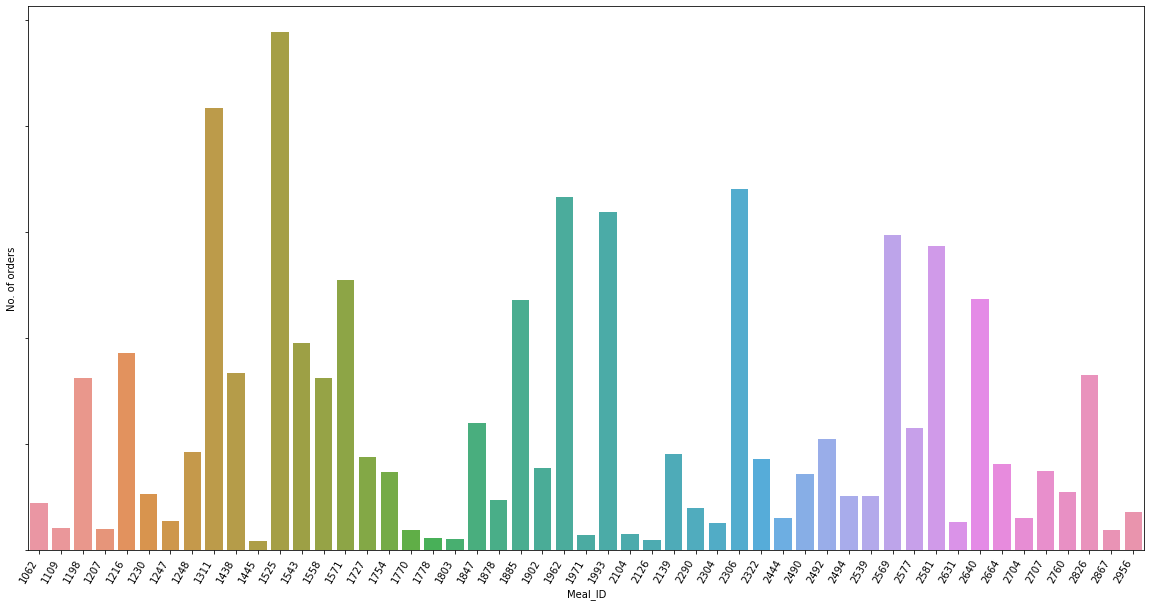

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.xlabel('Meal_ID')
plt.ylabel('No. of orders')
ax=sns.barplot(x=l,y=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())


In [ ]:
center=list(full_merge.center_id.unique())

In [ ]:
print(len(center))

77


In [ ]:
c_group=full_merge.groupby('center_id')
c_order=list(c_group['num_orders'].agg(np.sum))
print(len(c_order))

77


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

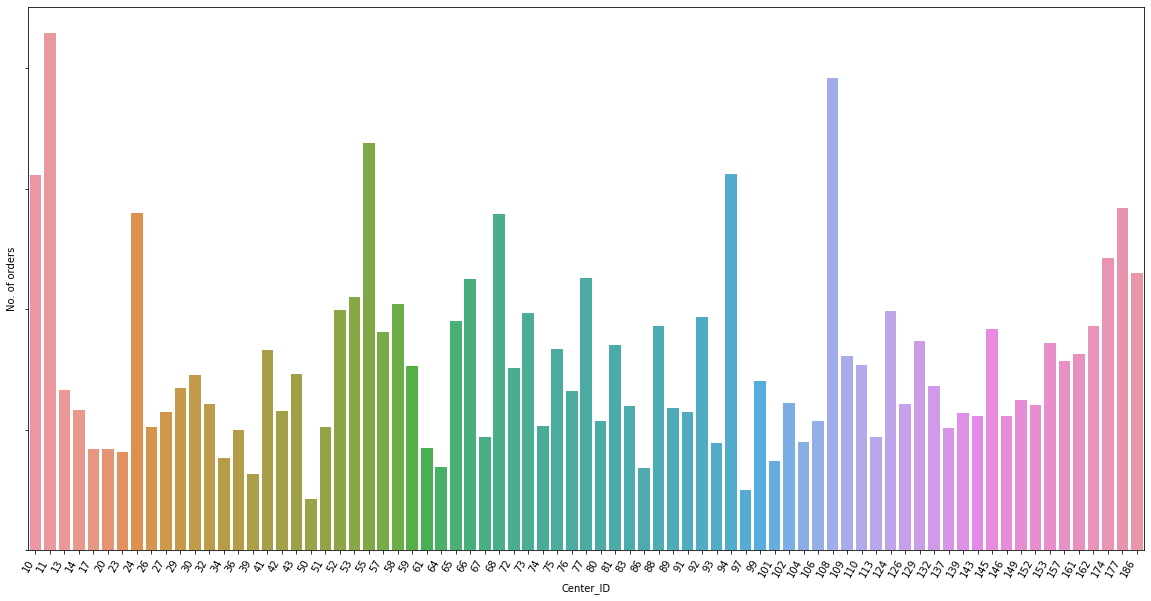

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Center_ID')
plt.ylabel('No. of orders')
ax=sns.barplot(x=center,y=c_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())


In [ ]:
cuisine=list(full_merge.cuisine.unique())
print(len(cuisine))

4


In [ ]:
cuisine_order=list(full_merge.groupby('cuisine')['num_orders'].agg(np.sum))

In [ ]:
print(len(cuisine_order))

4


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

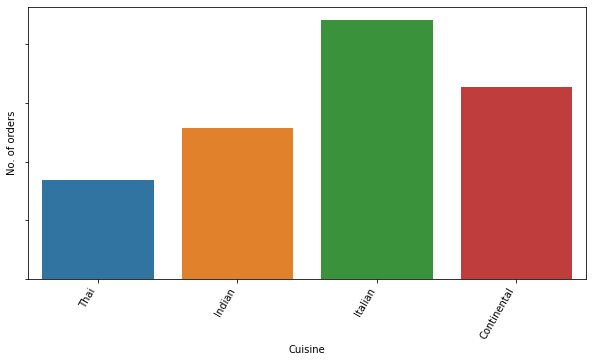

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Cuisine')
plt.ylabel('No. of orders')
ax=sns.barplot(x=cuisine,y=cuisine_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())


In [ ]:
cat=full_merge.category.unique()
cat_order=list(full_merge.groupby('category')['num_orders'].agg(np.sum))

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

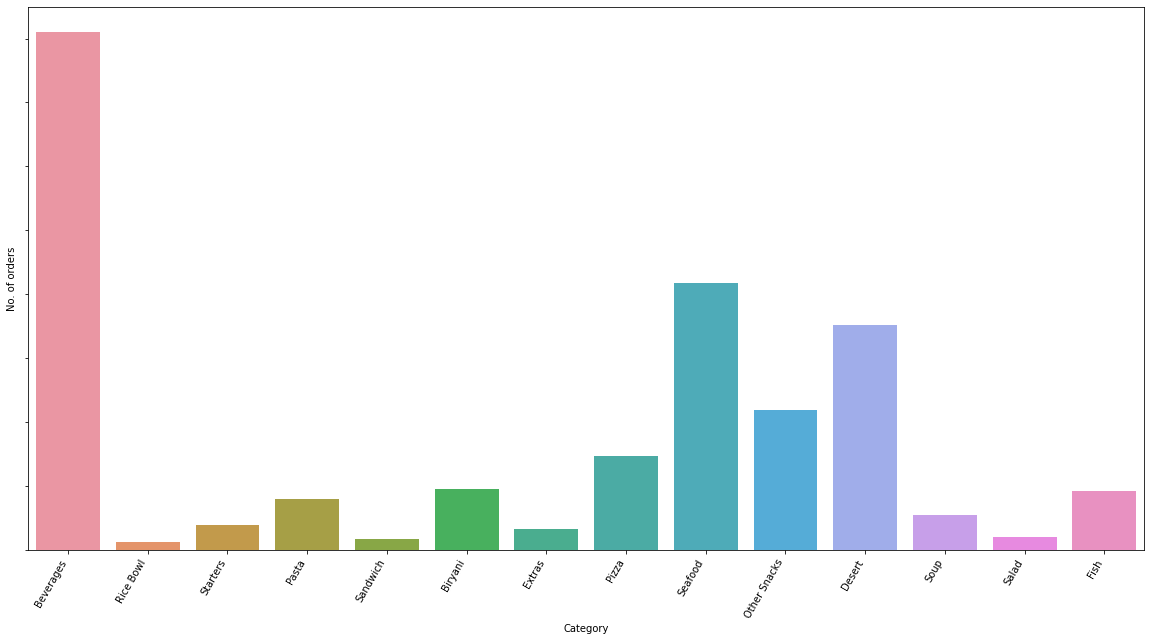

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Category')
plt.ylabel('No. of orders')
ax=sns.barplot(x=cat,y=cat_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())


In [ ]:
import math
prediction=pd.read_csv('/content/drive/My Drive/Colab Notebooks/results.csv')
prediction.num_orders=prediction.num_orders.astype('int')
full_test=pd.merge(full_test,prediction,how='left',left_on='id',right_on='id')

In [ ]:
full_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,discount_per,num_orders
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,0.628496,197
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,-0.628496,170
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,1.256755,115
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian,0.000000,51
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian,0.000000,40


In [ ]:
lt=list(full_test.meal_id.unique())
print(len(lt))

51


In [ ]:
meal_groupt=full_test.groupby('meal_id')
order_sortt=list(meal_groupt['num_orders'].agg(np.sum))
print(len(order_sortt))

51


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

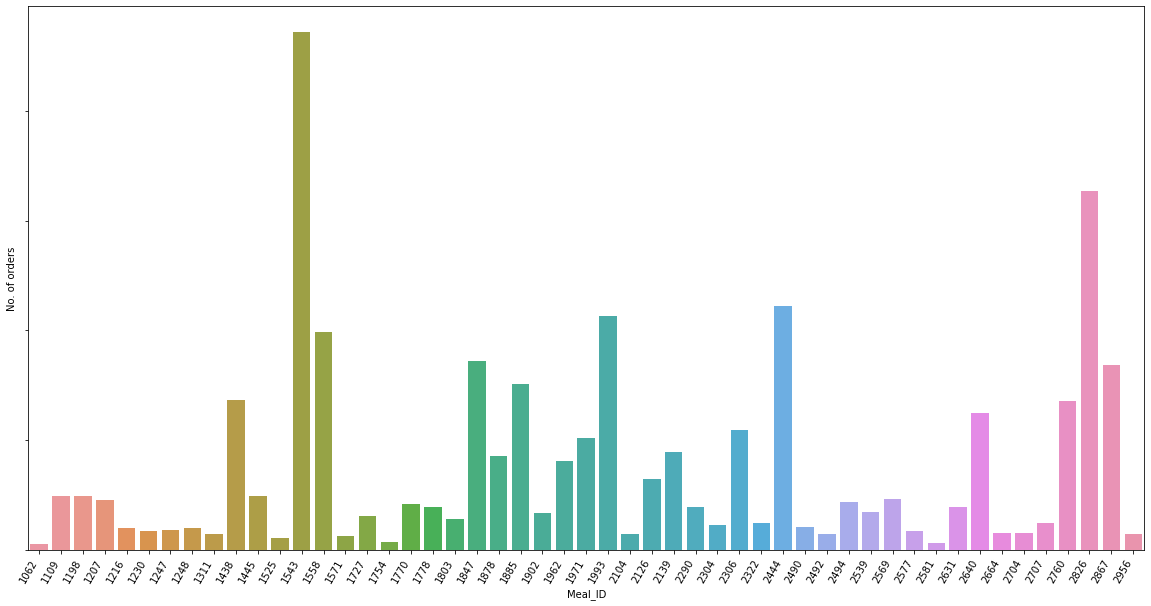

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Meal_ID')
plt.ylabel('No. of orders')
ax=sns.barplot(x=lt,y=order_sortt)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())


In [ ]:
centert=list(full_test.center_id.unique())
c_groupt=full_test.groupby('center_id')
c_ordert=list(c_groupt['num_orders'].agg(np.sum))
print(len(c_ordert))


77


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

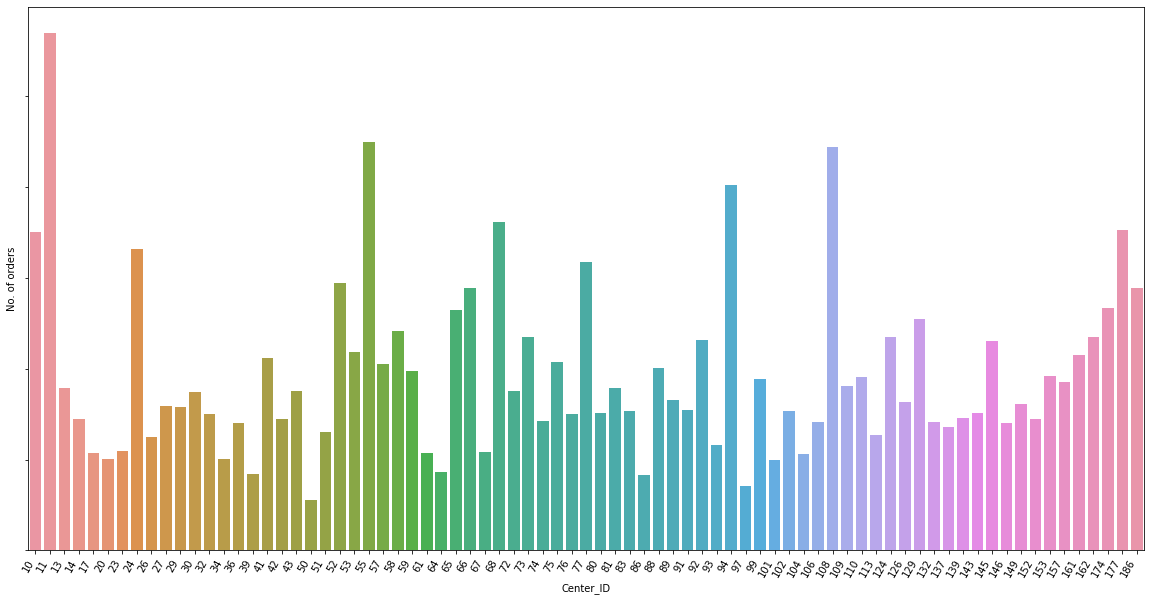

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Center_ID')
plt.ylabel('No. of orders')
ax=sns.barplot(x=centert,y=c_ordert)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

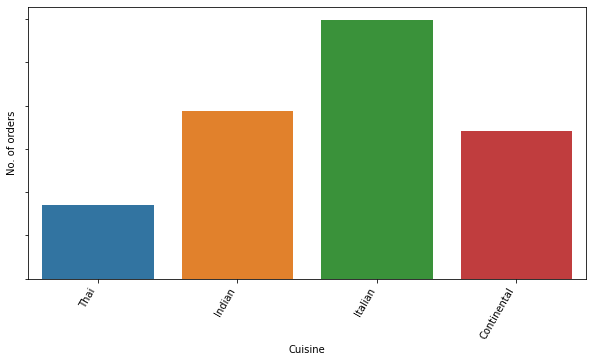

In [ ]:
cuisinet=list(full_test.cuisine.unique())

cuisine_ordert=list(full_test.groupby('cuisine')['num_orders'].agg(np.sum))
plt.figure(figsize=(10,5))
plt.xlabel('Cuisine')
plt.ylabel('No. of orders')
ax=sns.barplot(x=cuisinet,y=cuisine_ordert)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

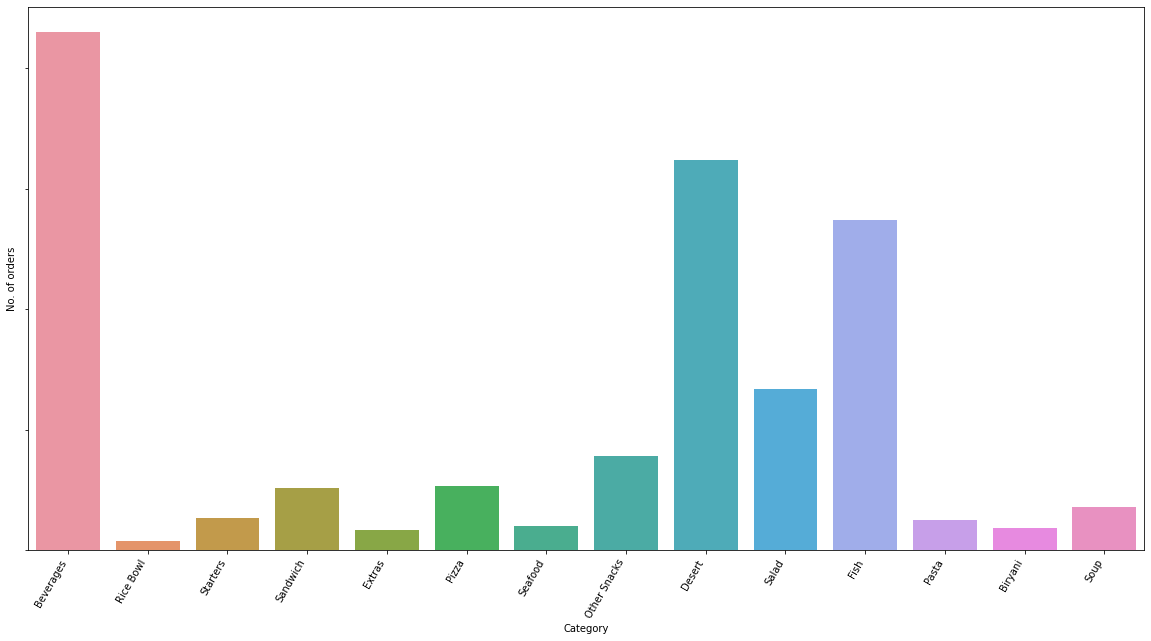

In [ ]:
catt=full_test.category.unique()
cat_ordert=list(full_test.groupby('category')['num_orders'].agg(np.sum))
plt.figure(figsize=(20,10))
plt.xlabel('Category')
plt.ylabel('No. of orders')
ax=sns.barplot(x=catt,y=cat_ordert)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels())
